In [1]:
## First set working directory
import os
os.chdir('C:/Users/user/Desktop/Heart Failure')

os.getcwd()

'C:\\Users\\user\\Desktop\\Heart Failure'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import  GridSpec
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True) 
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import DataScienceHelper as dsh

%matplotlib inline

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import normalize, StandardScaler
from sklearn import metrics 





In [82]:
## We look at the data using the head and tail functions
HF = pd.read_csv('heart_failure_clinical_records_dataset.csv')

HF.head(5)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [83]:
HF.tail(5)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

In [84]:
HF.shape

(299, 13)

In [9]:
HF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### The above shows that all variables of the integer and float type. However looking at summary statistics of the data we can see that some variables are of the binary format and as such cannot be analysed as either integer or floating variables. We have to rectify accordingly

In [10]:
HF.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [11]:
HF.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### We can see from the above that there are no missing values in any of the columns, which makes our job relatively much easier

In [50]:
## Change the data type of the variables with Binary values to the appropriate data type
HF["anaemia"] = HF["anaemia"].astype(str)
HF["diabetes"] = HF["diabetes"].astype(str)
HF["high_blood_pressure"] = HF["high_blood_pressure"].astype(str)
HF["sex"] = HF["sex"].astype(str)
HF["smoking"] = HF["smoking"].astype(str)
HF["DEATH_EVENT"] = HF["DEATH_EVENT"].astype(str)


In [14]:
print(HF.describe())
print(HF.describe(include = np.object))

              age  creatinine_phosphokinase  ejection_fraction      platelets  \
count  299.000000                299.000000         299.000000     299.000000   
mean    60.833893                581.839465          38.083612  263358.029264   
std     11.894809                970.287881          11.834841   97804.236869   
min     40.000000                 23.000000          14.000000   25100.000000   
25%     51.000000                116.500000          30.000000  212500.000000   
50%     60.000000                250.000000          38.000000  262000.000000   
75%     70.000000                582.000000          45.000000  303500.000000   
max     95.000000               7861.000000          80.000000  850000.000000   

       serum_creatinine  serum_sodium        time  
count         299.00000    299.000000  299.000000  
mean            1.39388    136.625418  130.260870  
std             1.03451      4.412477   77.614208  
min             0.50000    113.000000    4.000000  
25%       

# Visualizations

In [6]:
columns = list(HF._get_numeric_data().keys())

columns

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [20]:
pp.ProfileReport(HF) ## Another way of generating descriptive statistics using Pandas Profiling package

### KDE plots of Quantitative Variables

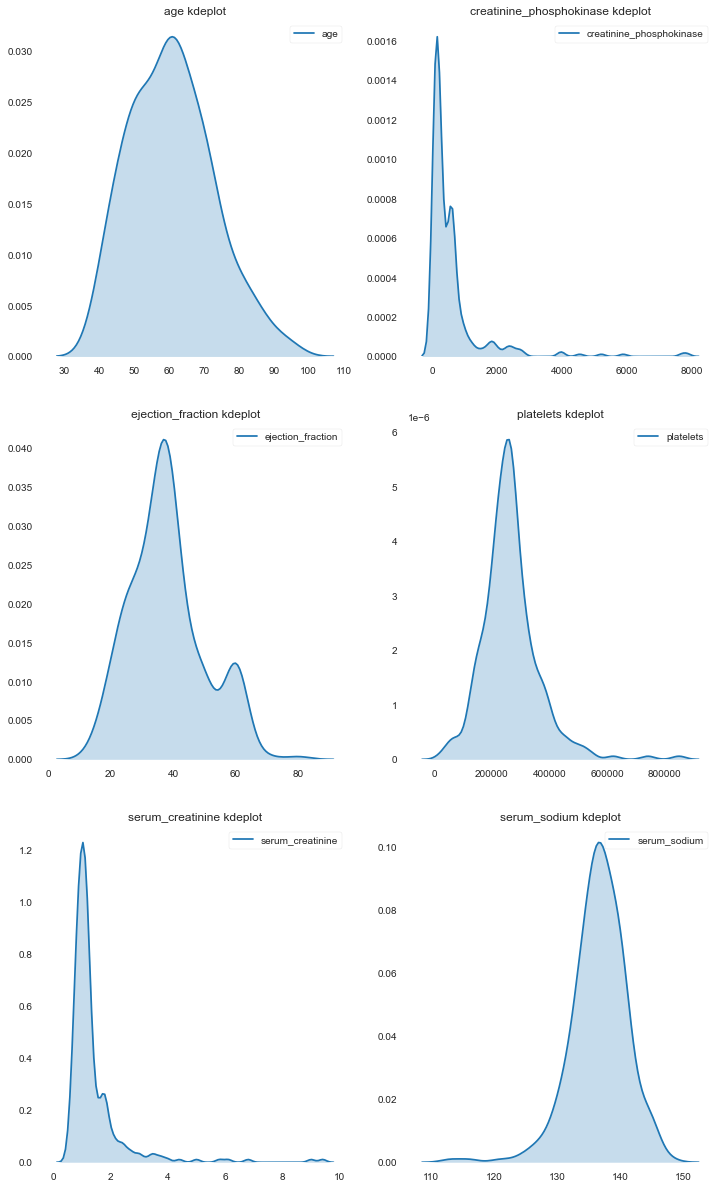

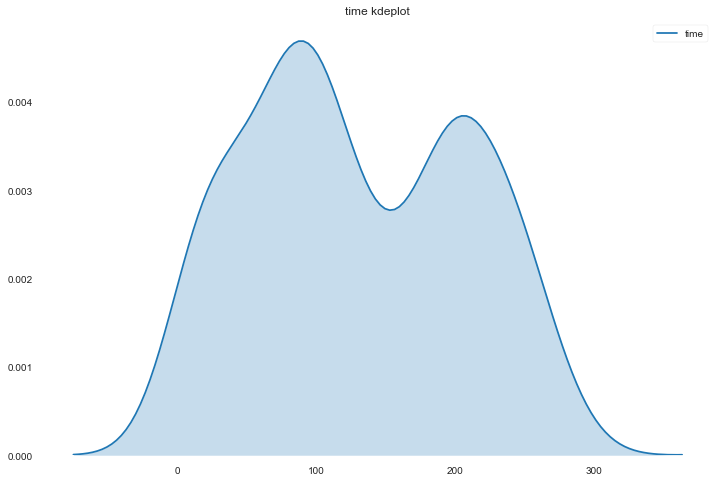

In [7]:
dsh.show_kdeplot(HF, columns)

### Boxplots of Quatitative Variables

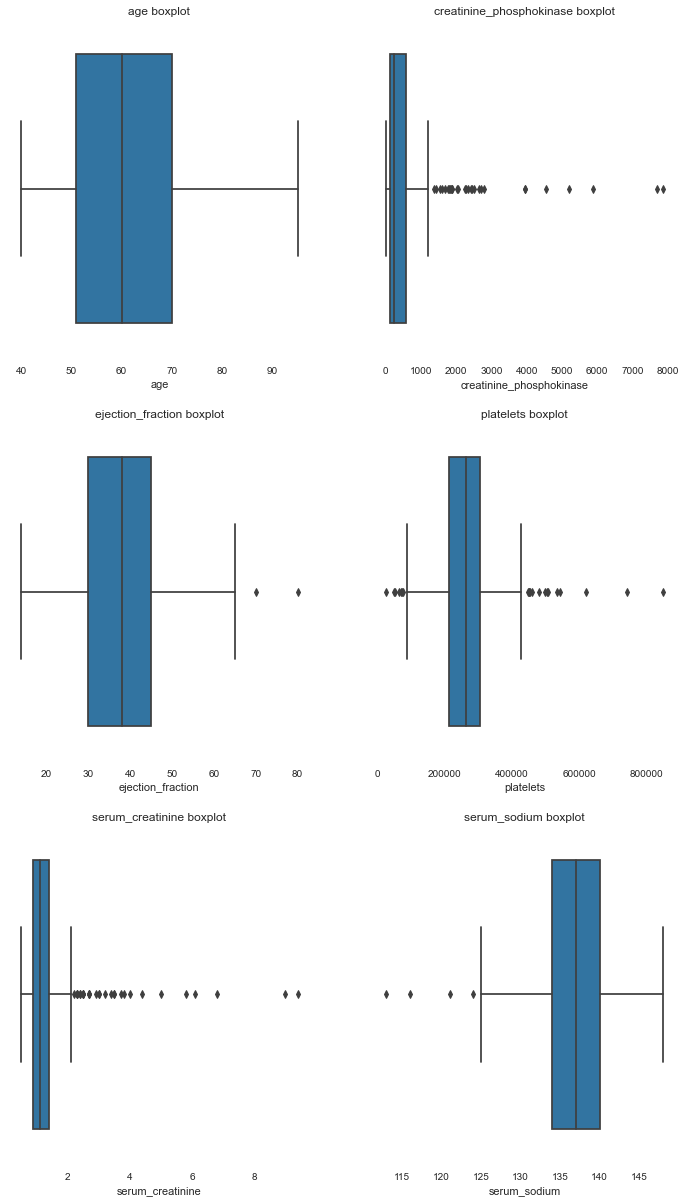

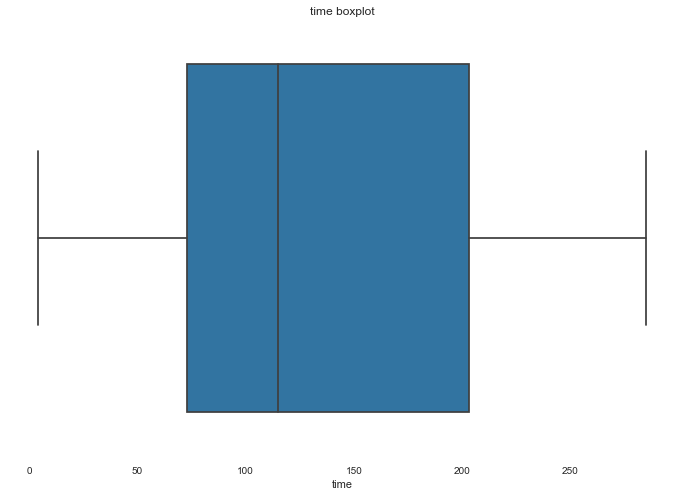

In [9]:
dsh.show_boxplot(HF, columns)

### Correlation Matrix

In [51]:
## First reconvert the categorical binary variables to intergers
cat_columns = list(HF.select_dtypes(include = 'object').keys())

for column in cat_columns:
    HF[column] = HF[column].astype(int)

print(cat_columns)

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']


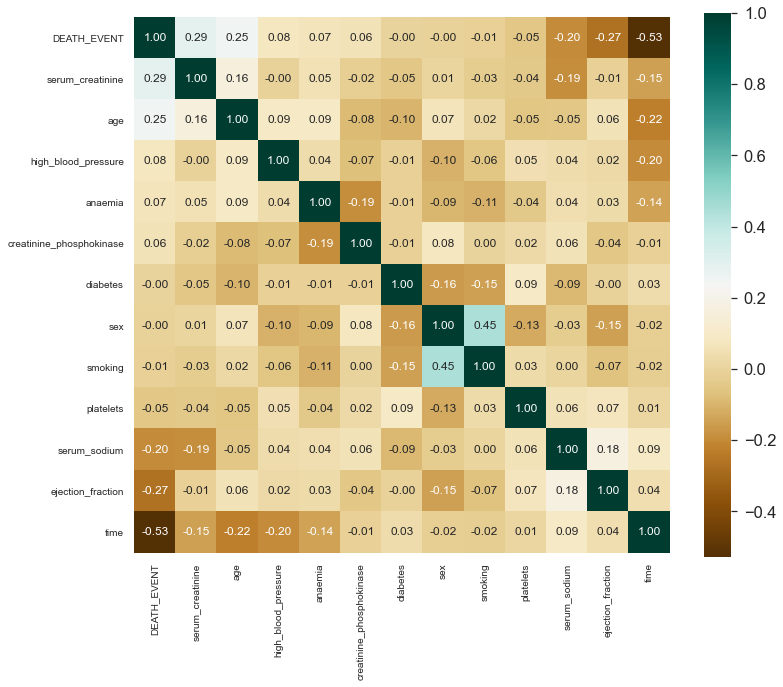

In [12]:
## Then we proceed with the correlation matrix
HF_matrix = HF.corr()

f, ax = plt.subplots(figsize = (12,10))
k = 13 ## Number of columns in the matrix
## Use the DEATH EVENT variable as index as it will be compared against other variables
cols = HF_matrix.nlargest(k, 'DEATH_EVENT')['DEATH_EVENT'].index 
hfm = np.corrcoef(HF[cols].values.T)
sns.set(font_scale = 1.5)

sns.heatmap(hfm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 12},
           cmap = 'BrBG', yticklabels = cols.values, xticklabels = cols.values)

plt.show()


# Modelling 

In [13]:
HF['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

#### From the above we can see that this is clearly an imbalanced data. Therefore, we will employ resampling techniques(Over Sampling)

In [85]:
Death_major = HF[HF['DEATH_EVENT'] == 0]
Death_minor = HF[HF['DEATH_EVENT'] == 1]

UP_min = resample(Death_minor, replace = True, n_samples = 203, random_state = 320)

## Combine the majority class with the upsampled minority class
HFN = pd.concat([Death_major, UP_min])

HFN['DEATH_EVENT'].value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

In [86]:
## get the target variable and the independent variables
target = HFN['DEATH_EVENT']
independent = HFN.drop(['DEATH_EVENT'], axis = 1)

In [87]:
## Normalize the independent variable values
independent = normalize(independent)
independent = StandardScaler().fit_transform(independent)



## OR
# independent = StandardScaler().fit_transform(normalize(independent))

### Logistic Regression

Test accuracy: 0.878/Test Size: 1
Test accuracy: 0.805/Test Size: 2
Test accuracy: 0.795/Test Size: 3
Test accuracy: 0.81/Test Size: 4
Test accuracy: 0.818/Test Size: 5
Test accuracy: 0.816/Test Size: 6
Test accuracy: 0.818/Test Size: 7
Test accuracy: 0.769/Test Size: 8
Test accuracy: 0.757/Test Size: 9


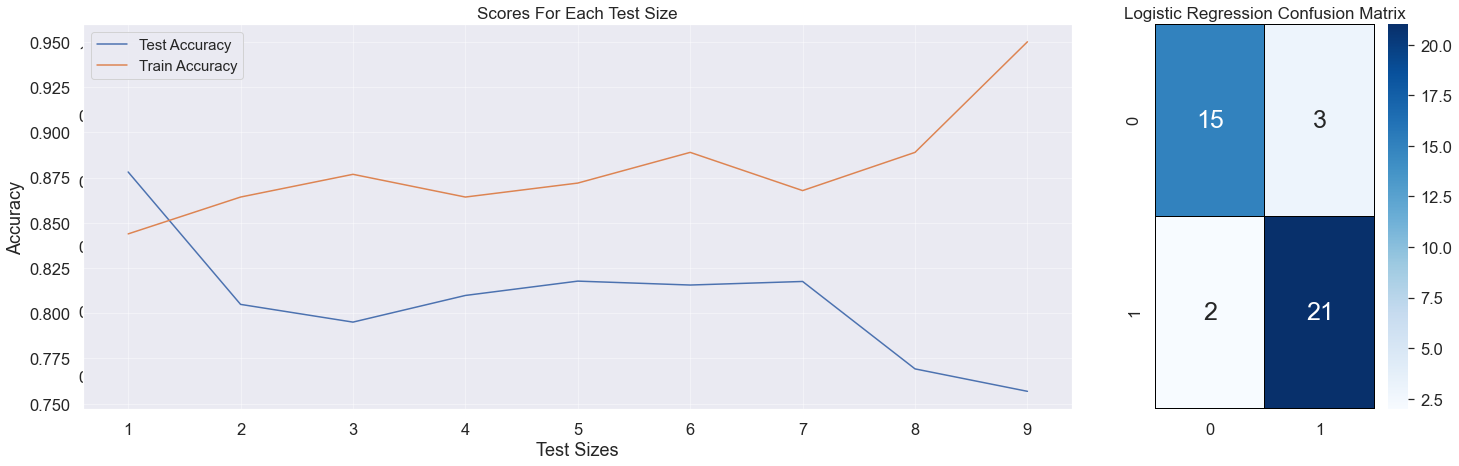

Best Accuracy(test): 0.8780487804878049/Test Size: 1


In [88]:
scores_lr = []
train_list = []
for i in range(1,10):
    x_train, x_test, y_train, y_test = train_test_split(independent, target,test_size = i/10, random_state = 123)
    
    
    lr = LogisticRegression()
    lr.fit(x_train,y_train) 
    print("Test accuracy: {}/Test Size: {}".format(np.round(lr.score(x_test,y_test),3),i))
    scores_lr.append(lr.score(x_test,y_test))
    train_list.append(lr.score(x_train,y_train))
     
    

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1, 4, left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])

ax1.plot(range(1,10),scores_lr,label = "Test Accuracy")
ax1.plot(range(1,10),train_list, label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Test Sizes")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores For Each Test Size",fontsize = 17)
ax1.grid(True, alpha = 0.4)


x_train, x_test, y_train, y_test = train_test_split(independent, 
                                                    target,test_size = (1 + scores_lr.index(np.max(scores_lr)))/10, 
                                                    random_state = 123)

lr_best = LogisticRegression(random_state = 123)
lr_best = lr_best.fit(x_train, y_train)
y_pred = lr_best.predict(x_test)
y_true = y_test


cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True, annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f',
            ax = ax2,cmap = "Blues",linecolor = "black")
plt.title("Logistic Regression Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy(test): {}/Test Size: {}".format(np.max(scores_lr), 1 + scores_lr.index(np.max(scores_lr))))

       

In [89]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.91      0.88      0.89        24

    accuracy                           0.88        41
   macro avg       0.87      0.88      0.88        41
weighted avg       0.88      0.88      0.88        41



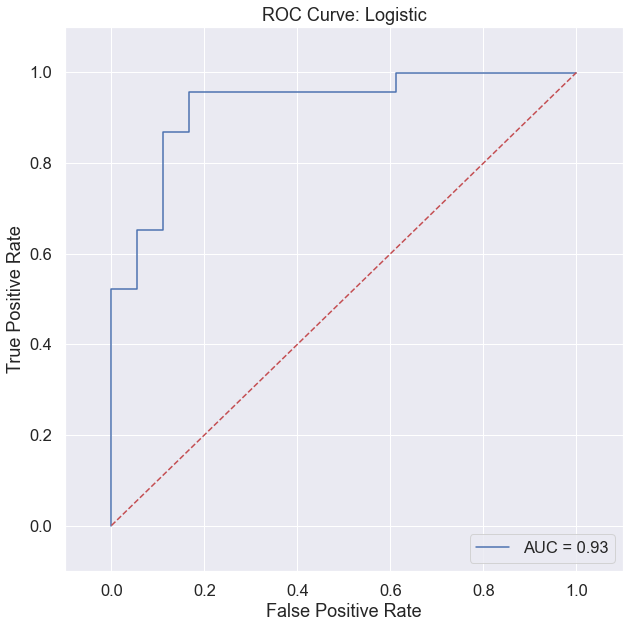

In [90]:
pred_prob = lr_best.predict_proba(x_test)

y_preds = pred_prob[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_true, y_preds)
auc_score = metrics.auc(fpr, tpr)

plt.figure(figsize = (10,10))
plt.title('ROC Curve: Logistic')
plt.plot(fpr, tpr, label = 'AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

### K-Nearest Neighbours

test accuracy: 0.841/Neighbors: 1
test accuracy: 0.805/Neighbors: 2
test accuracy: 0.756/Neighbors: 3
test accuracy: 0.78/Neighbors: 4
test accuracy: 0.744/Neighbors: 5
test accuracy: 0.805/Neighbors: 6
test accuracy: 0.78/Neighbors: 7
test accuracy: 0.756/Neighbors: 8
test accuracy: 0.768/Neighbors: 9
test accuracy: 0.768/Neighbors: 10
test accuracy: 0.805/Neighbors: 11
test accuracy: 0.768/Neighbors: 12
test accuracy: 0.768/Neighbors: 13
test accuracy: 0.72/Neighbors: 14
test accuracy: 0.695/Neighbors: 15
test accuracy: 0.695/Neighbors: 16
test accuracy: 0.72/Neighbors: 17
test accuracy: 0.707/Neighbors: 18
test accuracy: 0.744/Neighbors: 19
test accuracy: 0.756/Neighbors: 20
test accuracy: 0.72/Neighbors: 21
test accuracy: 0.671/Neighbors: 22
test accuracy: 0.695/Neighbors: 23
test accuracy: 0.707/Neighbors: 24


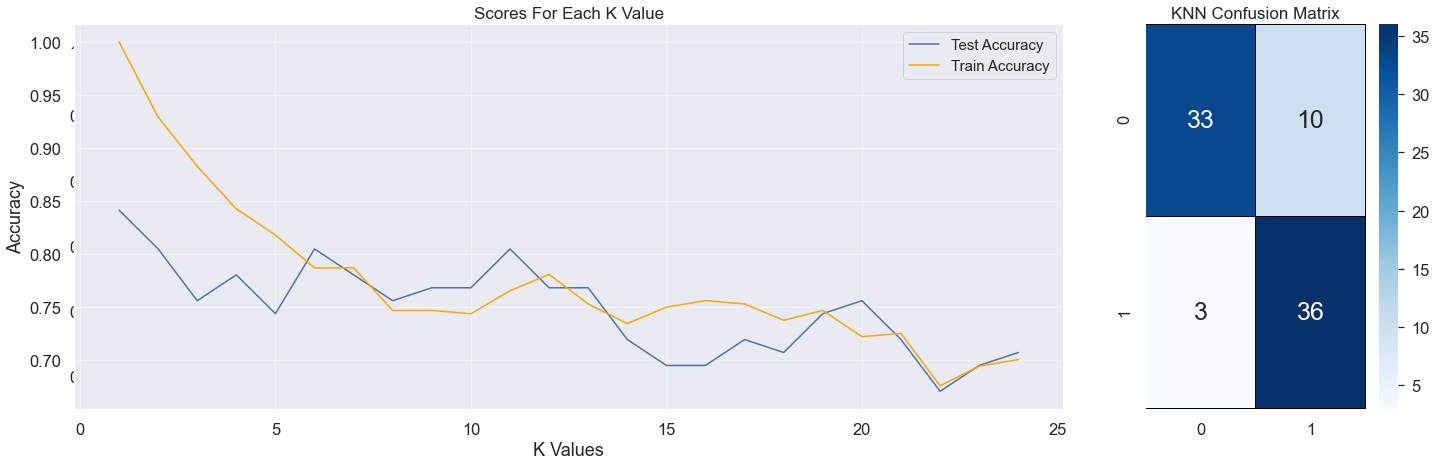

Best Accuracy(test): 0.8414634146341463/Neighbors: 1


In [91]:
x_train, x_test, y_train, y_test = train_test_split(independent, target, test_size = 0.2, random_state = 123)

scores_knn = []
train_list = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    print("test accuracy: {}/Neighbors: {}".format(np.round(knn.score(x_test,y_test), 3),i))
    scores_knn.append(knn.score(x_test,y_test))
    train_list.append(knn.score(x_train,y_train))
    

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])    

ax1.plot(range(1,25),scores_knn, label = "Test Accuracy")
ax1.plot(range(1,25),train_list,c = "orange", label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("K Values")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores For Each K Value",fontsize = 17)
ax1.grid(True , alpha = 0.4)



Best_knn = KNeighborsClassifier(n_neighbors = 1 + scores_knn.index(np.max(scores_knn)))
Best_knn = Best_knn.fit(x_train, y_train)
y_pred = Best_knn.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)


sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("KNN Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy(test): {}/Neighbors: {}".format(np.max(scores_knn),1 + scores_knn.index(np.max(scores_knn))))


In [59]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        36
           1       0.92      0.78      0.85        46

    accuracy                           0.84        82
   macro avg       0.85      0.85      0.84        82
weighted avg       0.85      0.84      0.84        82



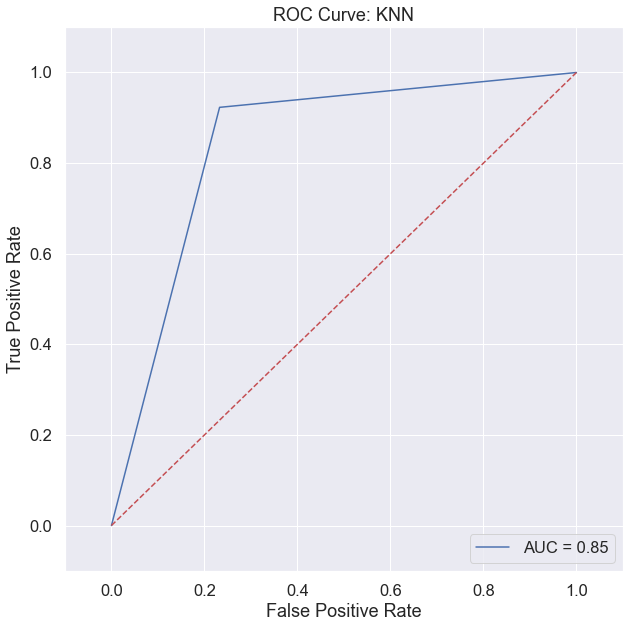

In [92]:
knn_prob = Best_knn.predict_proba(x_test)

y_preds = knn_prob[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_true, y_preds)
auc_score = metrics.auc(fpr, tpr)

plt.figure(figsize = (10,10))
plt.title('ROC Curve: KNN')
plt.plot(fpr, tpr, label = 'AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

### Support Vector Machine(SVM)

test accuracy: 0.817/Cache Size: 100
test accuracy: 0.817/Cache Size: 150
test accuracy: 0.817/Cache Size: 200
test accuracy: 0.817/Cache Size: 250
test accuracy: 0.817/Cache Size: 300
test accuracy: 0.817/Cache Size: 350
test accuracy: 0.817/Cache Size: 400
test accuracy: 0.817/Cache Size: 450


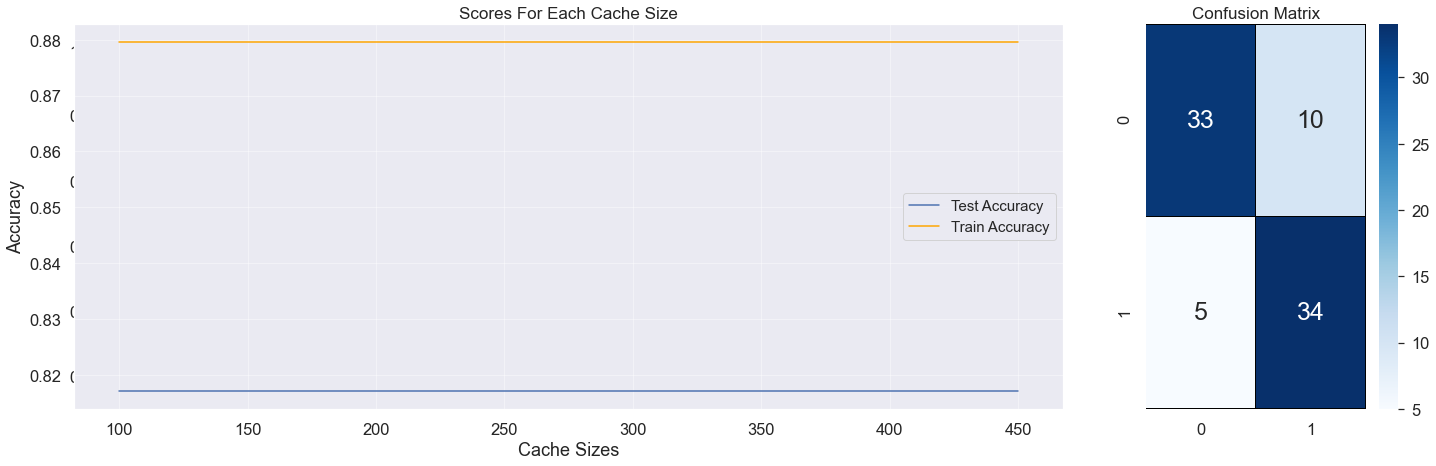

Best Accuracy(test): 0.8170731707317073/Cache Size: 100


In [61]:
scores_svm = []
train_list = []
for i in range(100,500,50):
    svm = SVC(cache_size = i)
    svm.fit(x_train,y_train)
    print("test accuracy: {}/Cache Size: {}".format(np.round(svm.score(x_test,y_test),3),i))
    scores_svm.append(svm.score(x_test,y_test))
    train_list.append(svm.score(x_train,y_train))



fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])  
    
ax1.plot(range(100,500,50), scores_svm, label = "Test Accuracy")
ax1.plot(range(100,500,50), train_list,c = "orange", label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Cache Sizes")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores For Each Cache Size",fontsize = 17)
ax1.grid(True , alpha = 0.4)

Best_SVM = SVC(cache_size = 50*(1+scores_svm.index(np.max(scores_svm))))
Best_SVM = Best_SVM.fit(x_train, y_train)
y_pred = Best_SVM.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy(test): {}/Cache Size: {}".format(np.max(scores_svm), 
                                                      50 + 50 * (1 + scores_svm.index(np.max(scores_svm)))))

In [62]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81        38
           1       0.87      0.77      0.82        44

    accuracy                           0.82        82
   macro avg       0.82      0.82      0.82        82
weighted avg       0.82      0.82      0.82        82



### Decision Trees

Test accuracy: 0.671/Max Depth: 1
Test accuracy: 0.768/Max Depth: 2
Test accuracy: 0.817/Max Depth: 3
Test accuracy: 0.854/Max Depth: 4
Test accuracy: 0.841/Max Depth: 5
Test accuracy: 0.866/Max Depth: 6
Test accuracy: 0.866/Max Depth: 7
Test accuracy: 0.866/Max Depth: 8
Test accuracy: 0.866/Max Depth: 9


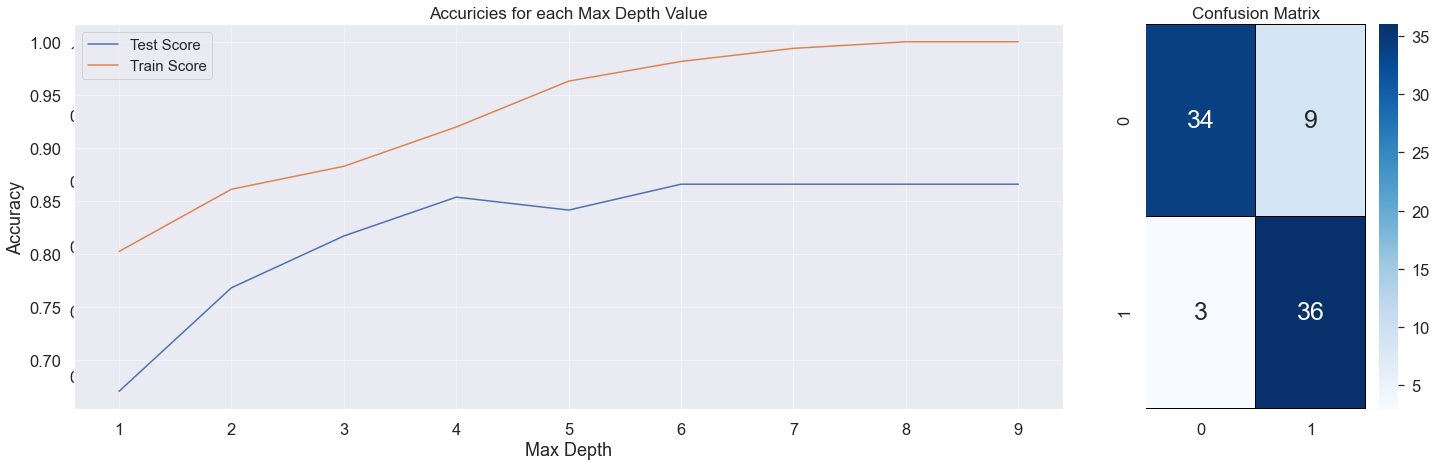

Best Accuracy: 0.8658536585365854/Max Depth: 6


In [93]:
scores_dt = []
train_list = []
for d in range(1,10):
    clf = DecisionTreeClassifier(max_depth = d,random_state = 123)
    clf = clf.fit(x_train, y_train)
    print("Test accuracy: {}/Max Depth: {}".format(np.round(clf.score(x_test,y_test),3),d))
    scores_dt.append(clf.score(x_test,y_test))
    train_list.append(clf.score(x_train,y_train))
    
fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])  
    
ax1.plot(range(1,10),scores_dt,label = "Test Score")
ax1.plot(range(1,10),train_list,label = "Train Score")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Max Depth")
ax1.set_ylabel("Accuracy")
ax1.grid(True, alpha = 0.5)
ax1.set_title("Accuricies for each Max Depth Value",fontsize = 17)

Best_DT = DecisionTreeClassifier(max_depth = 1 + scores_dt.index(np.max(scores_dt)))
Best_DT = Best_DT.fit(x_train, y_train)
y_pred = Best_DT.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Max Depth: {}".format(np.max(scores_dt), 1 + scores_dt.index(np.max(scores_dt))))

In [94]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        37
           1       0.92      0.80      0.86        45

    accuracy                           0.85        82
   macro avg       0.86      0.86      0.85        82
weighted avg       0.86      0.85      0.85        82



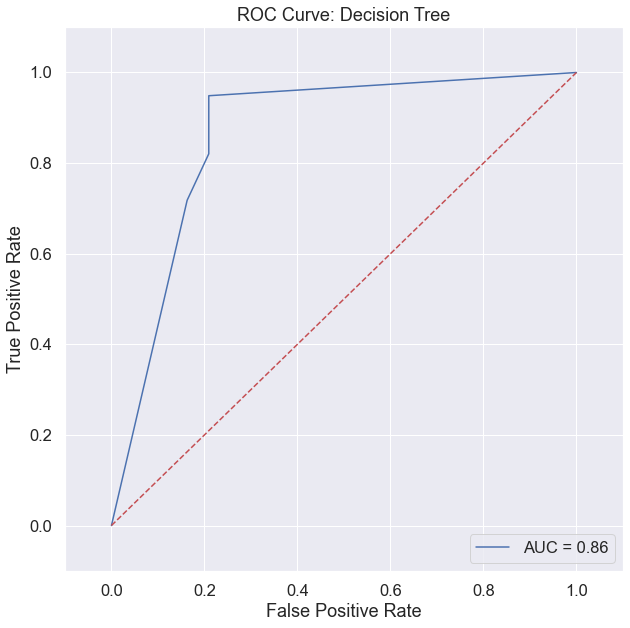

In [95]:
DT_prob = Best_DT.predict_proba(x_test)

y_preds = DT_prob[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_true, y_preds)
auc_score = metrics.auc(fpr, tpr)

plt.figure(figsize = (10,10))
plt.title('ROC Curve: Decision Tree')
plt.plot(fpr, tpr, label = 'AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

### Random Forests

Test Score: 0.89/Number of Estimators: 20 
Test Score: 0.902/Number of Estimators: 40 
Test Score: 0.915/Number of Estimators: 60 
Test Score: 0.915/Number of Estimators: 80 
Test Score: 0.915/Number of Estimators: 100 
Test Score: 0.902/Number of Estimators: 120 
Test Score: 0.902/Number of Estimators: 140 


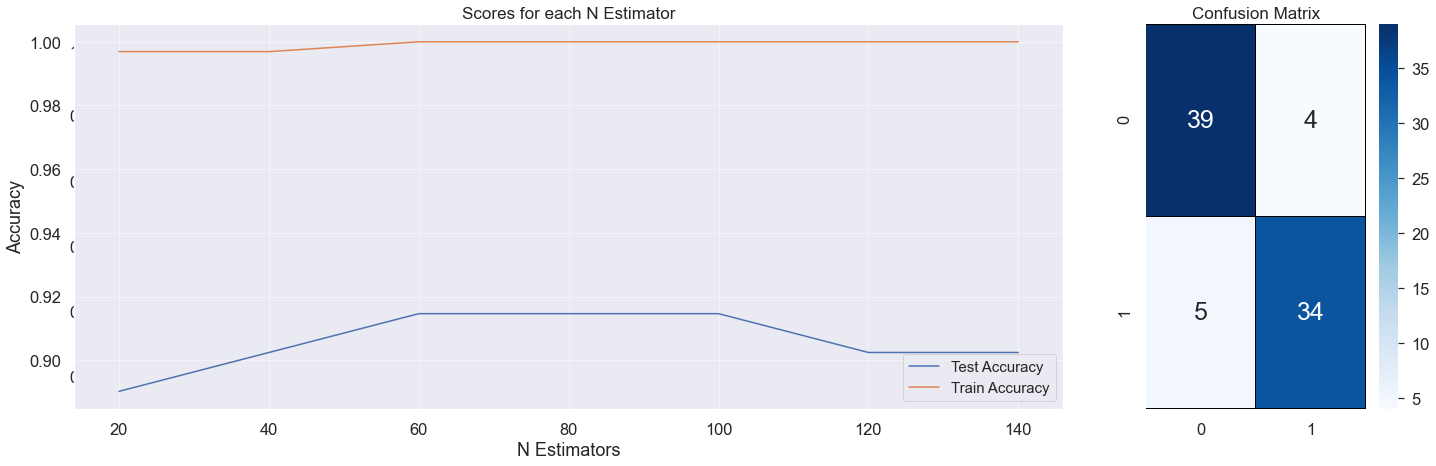

Best Accuracy: 0.9146341463414634/Max Depth: 60


In [96]:
scores_rf = []
train_list = []

for i in range(20,160,20):
    rf = RandomForestClassifier(n_estimators = i, random_state = 123) #100
    rf.fit(x_train,y_train)
    print("Test Score: {}/Number of Estimators: {} ".format(np.round(rf.score(x_test,y_test),3),i))
    scores_rf.append(rf.score(x_test,y_test))
    train_list.append(rf.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])  

ax1.plot(range(20,160,20),scores_rf,label = "Test Accuracy")
ax1.plot(range(20,160,20),train_list,label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("N Estimators")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores for each N Estimator",fontsize = 17)
ax1.grid(True, alpha=0.5)

Best_rf = RandomForestClassifier(n_estimators = 20*(1+scores_rf.index(np.max(scores_rf))))
Best_rf = Best_rf.fit(x_train, y_train)
y_pred = Best_rf.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()


print("Best Accuracy: {}/Max Depth: {}".format(np.max(scores_rf),
                                               20*(1+scores_rf.index(np.max(scores_rf)))))

In [97]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.87      0.89      0.88        38

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.89      0.89      0.89        82



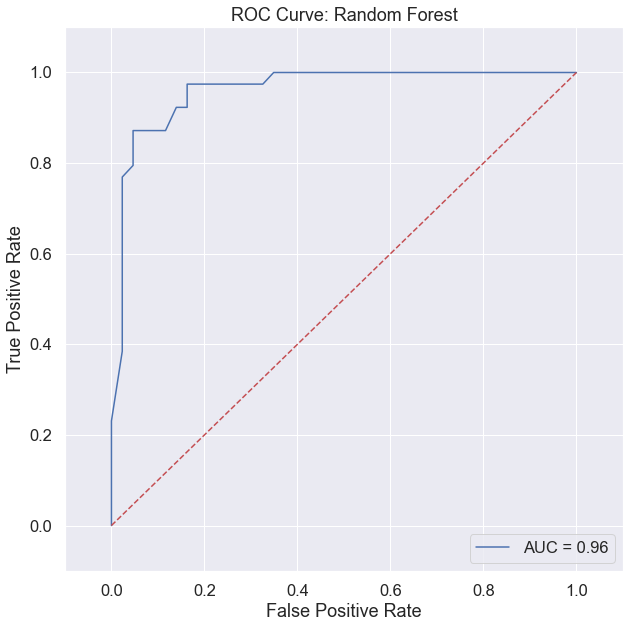

In [98]:
rf_prob = Best_rf.predict_proba(x_test)

y_preds = rf_prob[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_true, y_preds)
auc_score = metrics.auc(fpr, tpr)

plt.figure(figsize = (10,10))
plt.title('ROC Curve: Random Forest')
plt.plot(fpr, tpr, label = 'AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

### Perceptron

Test Score: 0.756/Alpha: 0.0001 
Test Score: 0.756/Alpha: 0.0002 
Test Score: 0.756/Alpha: 0.0003 
Test Score: 0.756/Alpha: 0.0004 
Test Score: 0.756/Alpha: 0.0005 
Test Score: 0.756/Alpha: 0.0006 
Test Score: 0.756/Alpha: 0.0007 
Test Score: 0.756/Alpha: 0.0008 
Test Score: 0.756/Alpha: 0.0009 


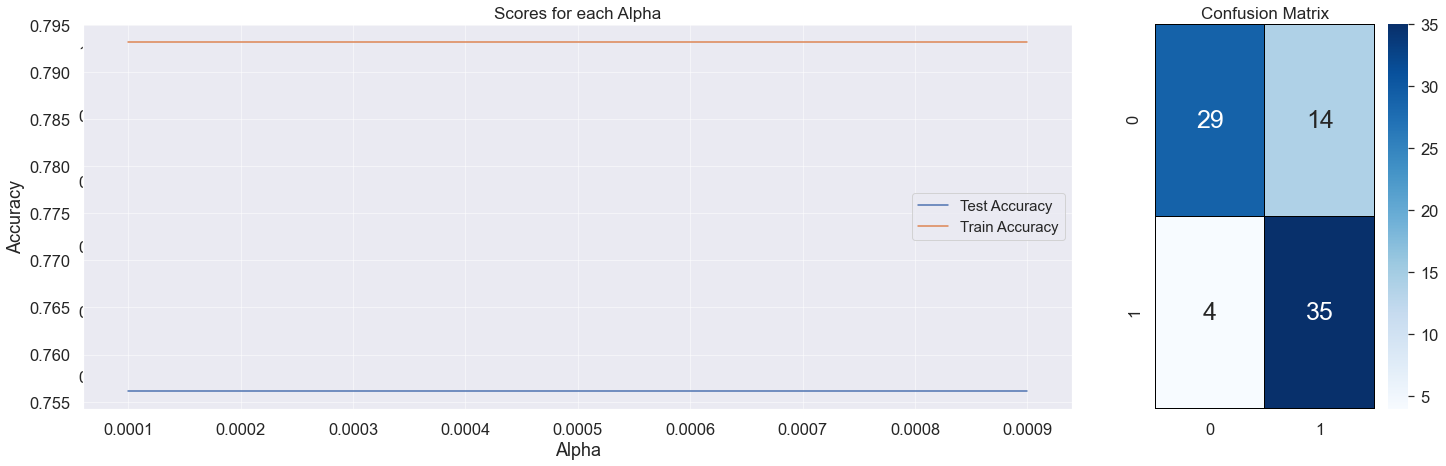

Best Accuracy: 0.7560975609756098/Alpha: 0.0001


In [70]:
scores_per = []
train_list = []
for i in np.arange(0.0001, 0.001, 0.0001):
    perceptron = Perceptron(alpha = i, random_state = 123) 
    perceptron.fit(x_train,y_train)
    print("Test Score: {}/Alpha: {} ".format(np.round(perceptron.score(x_test,y_test),3),np.round(i,5)))
    scores_per.append(perceptron.score(x_test,y_test))
    train_list.append(perceptron.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])      

ax1.plot(np.arange(0.0001,0.001, 0.0001),scores_per,label = "Test Accuracy")
ax1.plot(np.arange(0.0001,0.001, 0.0001),train_list,label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Alpha")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores for each Alpha",fontsize = 17)
ax1.grid(True, alpha=0.5)    

Best_per = Perceptron(alpha = 0.0001+0.0001*(1+scores_per.index(np.max(scores_per))))
Best_per = Best_per.fit(x_train, y_train)
y_pred = Best_per.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Alpha: {}".format(np.max(scores_per),0.0001*(1+scores_per.index(np.max(scores_per)))))

In [71]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        33
           1       0.90      0.71      0.80        49

    accuracy                           0.78        82
   macro avg       0.79      0.80      0.78        82
weighted avg       0.81      0.78      0.78        82



### Stochastic Gradient Descent

Test Score: 0.622/Epsilon: 0.05 
Test Score: 0.622/Epsilon: 0.07 
Test Score: 0.622/Epsilon: 0.09 
Test Score: 0.622/Epsilon: 0.11 
Test Score: 0.622/Epsilon: 0.13 
Test Score: 0.622/Epsilon: 0.15 
Test Score: 0.622/Epsilon: 0.17 
Test Score: 0.622/Epsilon: 0.19 
Test Score: 0.622/Epsilon: 0.21 
Test Score: 0.622/Epsilon: 0.23 
Test Score: 0.622/Epsilon: 0.25 
Test Score: 0.622/Epsilon: 0.27 
Test Score: 0.622/Epsilon: 0.29 


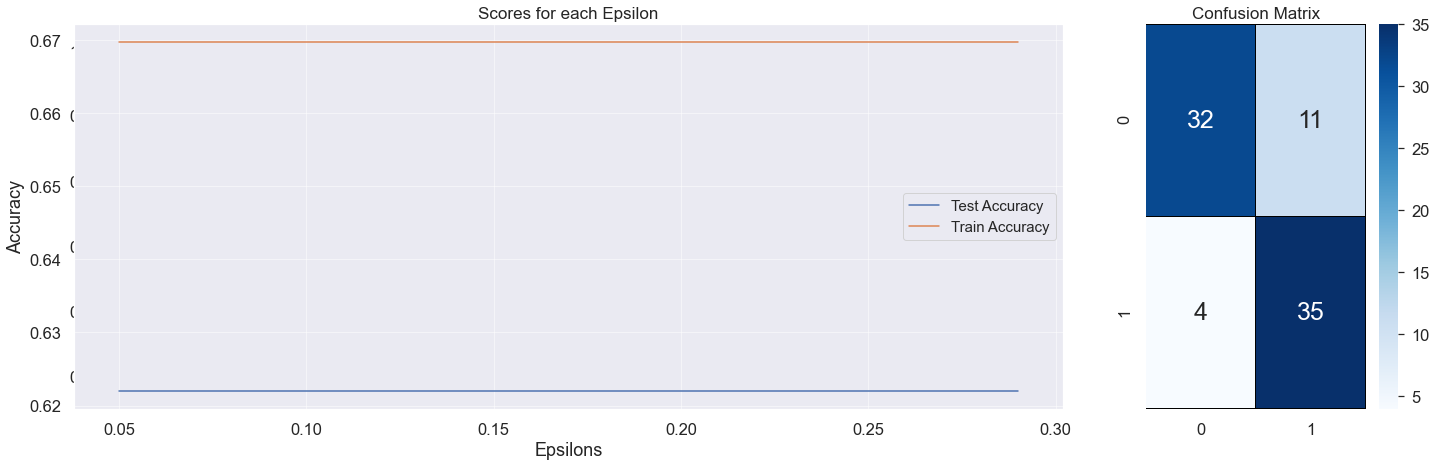

Best Accuracy: 0.6219512195121951/Epsilon: 0.05


In [73]:
scores_SGD = []
train_list = []
for i in np.arange(0.05, 0.3, 0.02):
    sgd = SGDClassifier(epsilon = i, random_state = 123) 
    sgd.fit(x_train,y_train)
    print("Test Score: {}/Epsilon: {} ".format(np.round(sgd.score(x_test,y_test),3),np.round(i,4)))
    scores_SGD.append(sgd.score(x_test,y_test))
    train_list.append(sgd.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])    

ax1.plot(np.arange(0.05, 0.3, 0.02),scores_SGD,label = "Test Accuracy")
ax1.plot(np.arange(0.05, 0.3, 0.02),train_list,label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Epsilons")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores for each Epsilon", fontsize = 17)
ax1.grid(True, alpha=0.5)

Best_SGD = SGDClassifier(epsilon = 0.03+0.02*(1 + scores_SGD.index(np.max(scores_SGD))))
Best_SGD = Best_SGD.fit(x_train, y_train)
y_pred = Best_SGD.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Epsilon: {}".format(np.max(scores_SGD),
                                             0.03+0.02*(1+scores_SGD.index(np.max(scores_SGD)))))

In [74]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        36
           1       0.90      0.76      0.82        46

    accuracy                           0.82        82
   macro avg       0.82      0.82      0.82        82
weighted avg       0.83      0.82      0.82        82



### Ridge Regression

Test Score: 0.805/Tol: 0.0005 
Test Score: 0.805/Tol: 0.001 
Test Score: 0.805/Tol: 0.0015 
Test Score: 0.805/Tol: 0.002 
Test Score: 0.805/Tol: 0.0025 


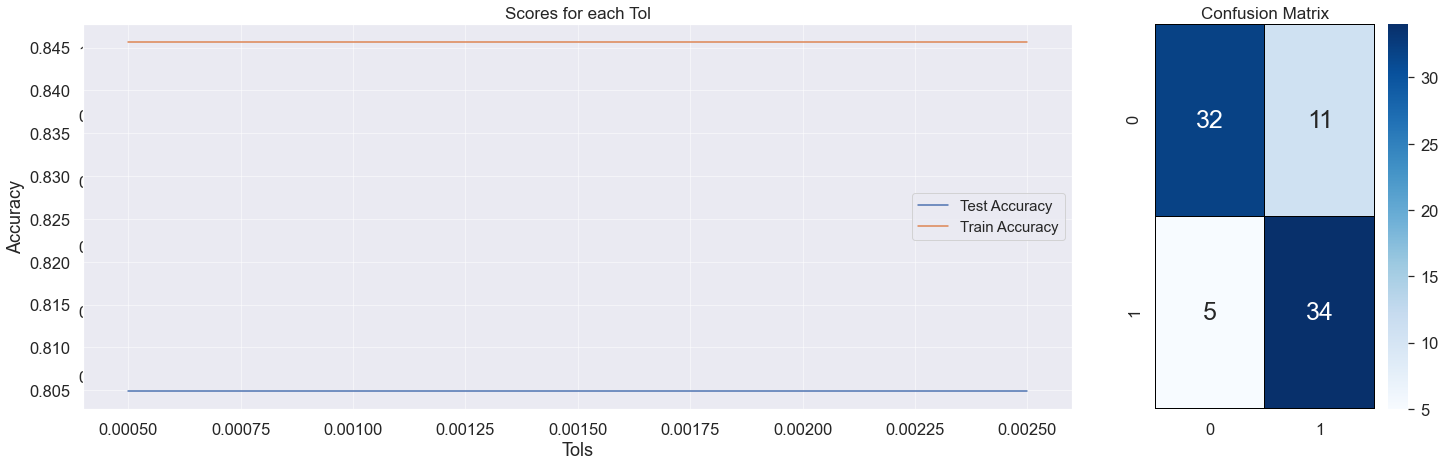

Best Accuracy: 0.8048780487804879/Tol: 0.0005


In [76]:
scores_ridge = []
train_list = []
for i in np.arange(0.0005, 0.003, 0.0005):
    ridge = RidgeClassifier(tol = i, random_state = 123) 
    ridge.fit(x_train,y_train)
    print("Test Score: {}/Tol: {} ".format(np.round(ridge.score(x_test,y_test),3),np.round(i,4)))
    scores_ridge.append(ridge.score(x_test,y_test))
    train_list.append(ridge.score(x_train,y_train))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)

grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax2 = fig.add_subplot(grid[3:4])  

ax1.plot(np.arange(0.0005, 0.003, 0.0005),scores_ridge,label = "Test Accuracy")
ax1.plot(np.arange(0.0005, 0.003, 0.0005),train_list,label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Tols")
ax1.set_ylabel("Accuracy")
ax1.set_title("Scores for each Tol",fontsize = 17)
ax1.grid(True, alpha=0.5)

Best_Ridge = RidgeClassifier(tol = 0.0005*(1+scores_ridge.index(np.max(scores_ridge))))
Best_Ridge = Best_Ridge.fit(x_train, y_train)
y_pred = Best_Ridge.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f', ax=ax2,cmap = "Blues",linecolor = "black")
plt.title("Confusion Matrix",fontsize = 17)
plt.show()

print("Best Accuracy: {}/Tol: {}".format(np.max(scores_ridge),0.0005*(1+scores_ridge.index(np.max(scores_ridge)))))

In [78]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80        43
           1       0.76      0.87      0.81        39

    accuracy                           0.80        82
   macro avg       0.81      0.81      0.80        82
weighted avg       0.81      0.80      0.80        82



### Naive Bayes

Test Accuracy:  0.5487804878048781


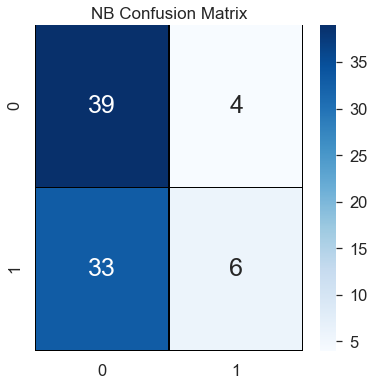

In [38]:
nb = GaussianNB()
nb.fit(x_train,y_train)

print("Test Accuracy: ",nb.score(x_test,y_test))

y_pred = nb.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true,y_pred)

plt.figure(figsize = (6,6))
sns.heatmap(cm, annot=True,annot_kws = {"size": 25}, linewidths=0.5, fmt = '.0f',cmap = "Blues",linecolor = "black")
plt.title("NB Confusion Matrix",fontsize = 17)
plt.show()

### Compile the results

In [39]:
models = {"Models":["Logistic Regression",
                       "KNN",
                       "SVC",
                       "Decision Tree",
                       "Random Forest",
                       "Perceptron",
                       "Sthocastic Gradient Descent",
                       "Ridge", "Naive Bayes"],
             "Scores":[np.max(scores_lr).round(3),
                       np.max(scores_knn).round(3),
                       np.max(scores_svm).round(3),
                       np.max(scores_dt).round(3),
                       np.max(scores_rf).round(3),
                       np.max(scores_per).round(3),
                       np.max(scores_SGD).round(3),
                       np.max(scores_ridge).round(3),
                       nb.score(x_test,y_test).round(3)]}


modelsDF = pd.DataFrame(models)
modelsDF = modelsDF.sort_values(by = ["Scores"])
modelsDF.head(len(modelsDF)) 


Models  Scores
8                  Naive Bayes   0.549
6  Sthocastic Gradient Descent   0.622
5                   Perceptron   0.756
7                        Ridge   0.805
2                          SVC   0.817
1                          KNN   0.841
3                Decision Tree   0.866
0          Logistic Regression   0.878
4                Random Forest   0.915

In [42]:
trace = go.Bar(
    x = modelsDF["Models"],
    y = modelsDF["Scores"],
    text = modelsDF["Scores"],
    textposition = "auto",
    marker=dict(color = modelsDF["Scores"],colorbar=dict(
            title="ColorScale"
        ),colorscale="Viridis",))

data = [trace]
layout = go.Layout(title = "Comparison of Models",template = "plotly_white")

fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(title_text = "Models")
fig.update_yaxes(title_text = "Scores")
fig.show()